<a href="https://colab.research.google.com/github/SamarthP7704/Featurisation-and-model-tunning/blob/main/Featurisation_and_Model_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEATURISATION & MODEL TUNING**

Semiconductor manufacturing yield prediction

## **Project Context**

This project focuses on analysing high-dimensional sensor data collected throughout a semiconductor manufacturing process. Modern fabrication lines record hundreds of signals from various sensors and measurement points. These signals vary in usefulness and may include redundant information, irrelevant variables, and noise.

Since each sensor reading can be treated as a feature, feature selection becomes an important step in identifying the specific signals that influence downstream yield outcomes. The objective is to determine which subset of signals provides the most value for predicting product yield. Reducing the feature space improves interpretability, speeds up model training, and can support better decision making in process engineering environments.

## **Data Description**

File: *sensor-data.csv*

Shape: *1567 rows, 592 columns*

The dataset contains 1567 production samples. Each sample includes 591 sensor-based features along with a yield label. The target column indicates:

-1 for Pass

1 for Fail

Each row represents a single production entity evaluated at a specific test point in the manufacturing process.

## **Objective**

The goal of this project is to build a classification model that predicts Pass or Fail outcomes for each production entity. An additional objective is to evaluate whether all available features are required or if a reduced set of signals provides comparable or better predictive power.

1. **Data Import and Exploration**

• ***Data Loading and Structure Review***

The dataset was imported and examined to understand its dimensions, feature types, value ranges, and target distribution. Summary statistics and structural characteristics were evaluated to identify any data quality issues.

• ***Data Cleansing***

Missing values were handled according to feature properties and logical requirements.
Attributes were removed when they showed no variance or lacked relevance to the prediction task.

Additional transformations were applied as needed, such as scaling or outlier adjustments, based on functional reasoning and data patterns.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving signal-data.csv to signal-data.csv


# **Import Libraries**

In [2]:
# Import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**• Import all the given datasets and explore shape and size of each.**

In [3]:
#Import Dataset

df1 = pd.read_csv('signal-data.csv')


In [4]:
Sensor_df = df1.copy(deep=True)

**Check dimension and datatypes of all the columns of the datasets**

In [5]:
# Check the dimensions of final dataset
print(f" Shape of the dataframe = {Sensor_df.shape}")

 Shape of the dataframe = (1567, 592)


In [6]:
# Checking attributes of first dataset
Sensor_df.info()
Sensor_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


# **2. Data cleansing:**

• Missing value treatment.

• Drop attribute/s if required using relevant functional knowledge.

• Make all relevant modifications on the data using both functional/logical reasoning/assumptions.



**Checking for null values in the dataset.**

In [7]:
Sensor_df.isnull().sum().sum()

np.int64(41951)

In [8]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# Absence of a signal is assumed to be no signal in the dataset
# so better we not take median or mean and replace them with zeros

Sensor_df = df1.replace(np.nan, 0)

In [9]:
Sensor_df.isnull().any().any()

np.False_

In [10]:
# Explore data type of each columns of final dataset.
Sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


There are 1567 rows and 592 columns in the final dataset.

In [11]:
# Let's check the five point summary of each feature in the dataset.
Sensor_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3002.910638,200.204648,0.0000,2965.67000,3010.9200,3056.5400,3356.3500
1,1567.0,2484.700932,184.815753,0.0000,2451.51500,2498.9100,2538.7450,2846.4400
2,1567.0,2180.887035,209.206773,0.0000,2180.70000,2200.9556,2218.0555,2315.2667
3,1567.0,1383.901023,458.937272,0.0000,1080.11605,1283.4368,1590.1699,3715.0417
4,1567.0,4.159516,56.104457,0.0000,1.01100,1.3101,1.5188,1114.5366
...,...,...,...,...,...,...,...,...
586,1567.0,0.021445,0.012366,-0.0169,0.01340,0.0205,0.0276,0.1028
587,1567.0,0.016464,0.008815,0.0000,0.01060,0.0148,0.0203,0.0799
588,1567.0,0.005280,0.002869,0.0000,0.00330,0.0046,0.0064,0.0286
589,1567.0,99.606461,93.895701,0.0000,44.36860,71.7780,114.7497,737.3048


It is observed that in some of the columns there are significant outliers. But as the number of features are more, it is not possible to observe each feature individually. The outliers can be treated after significant diensionality reduction.


# **3. Data analysis & visualisation:**

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

# **Univariate analysis**

In [12]:
Sensor_df['Pass/Fail'].unique()

array([-1,  1])

In [13]:
# Check distribution of target variable
Sensor_df['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


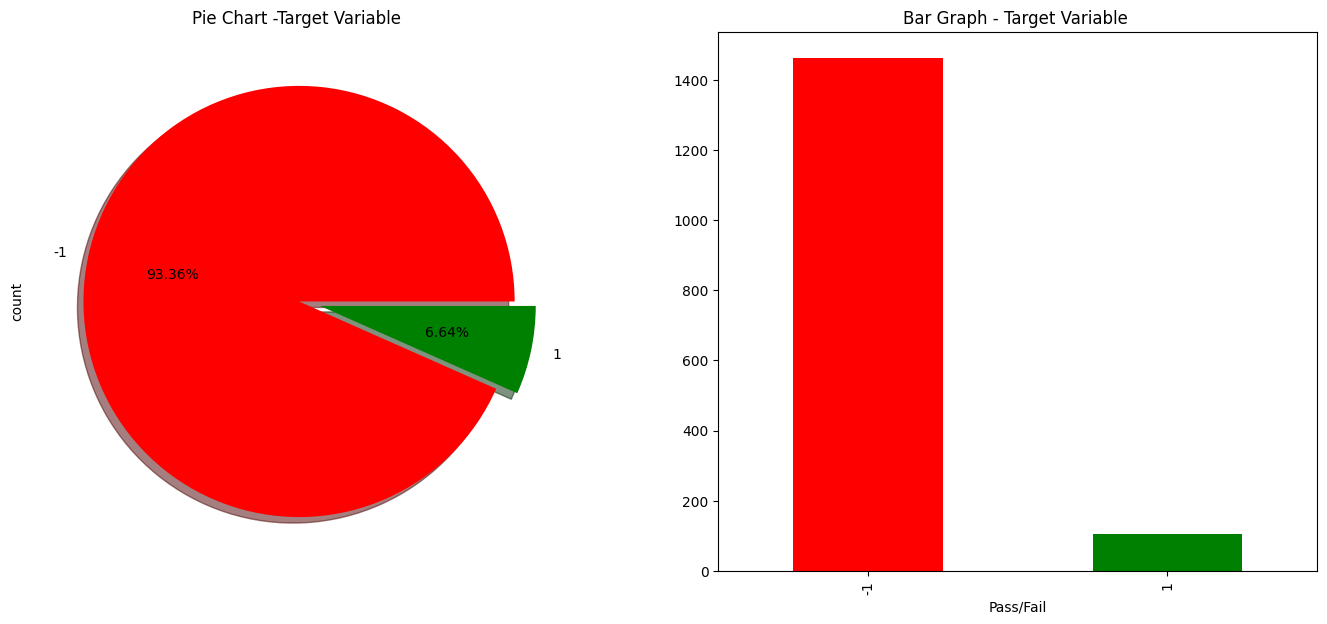

In [14]:
fig,axes=plt.subplots(1,2,figsize=(17,7))
size = Sensor_df['Pass/Fail'].value_counts()
colors = ['red', 'green']
Sensor_df['Pass/Fail'].value_counts().plot.pie(colors = colors,explode =[0, 0.1], autopct = "%.2f%%", shadow =True ,ax=axes[0])
Sensor_df['Pass/Fail'].value_counts().plot(color = colors,kind="bar",ax=axes[1])
axes[0].set_title('Pie Chart -Target Variable ')
axes[1].set_title('Bar Graph - Target Variable ')
plt.show()

**A bar plot and value counts above revealed that the target variable is highly unbalanced, with nearly most of the passable sensor data.**

**Checking distribution of sensors outputs**

In [15]:
unique_vals = Sensor_df['Pass/Fail'].unique()  # [-1, 1]
targets = [ Sensor_df.loc[ Sensor_df['Pass/Fail'] == val] for val in unique_vals]

In [16]:
unique_vals

array([-1,  1])

**Distribution of five random variables based on target values (-1, 1).**

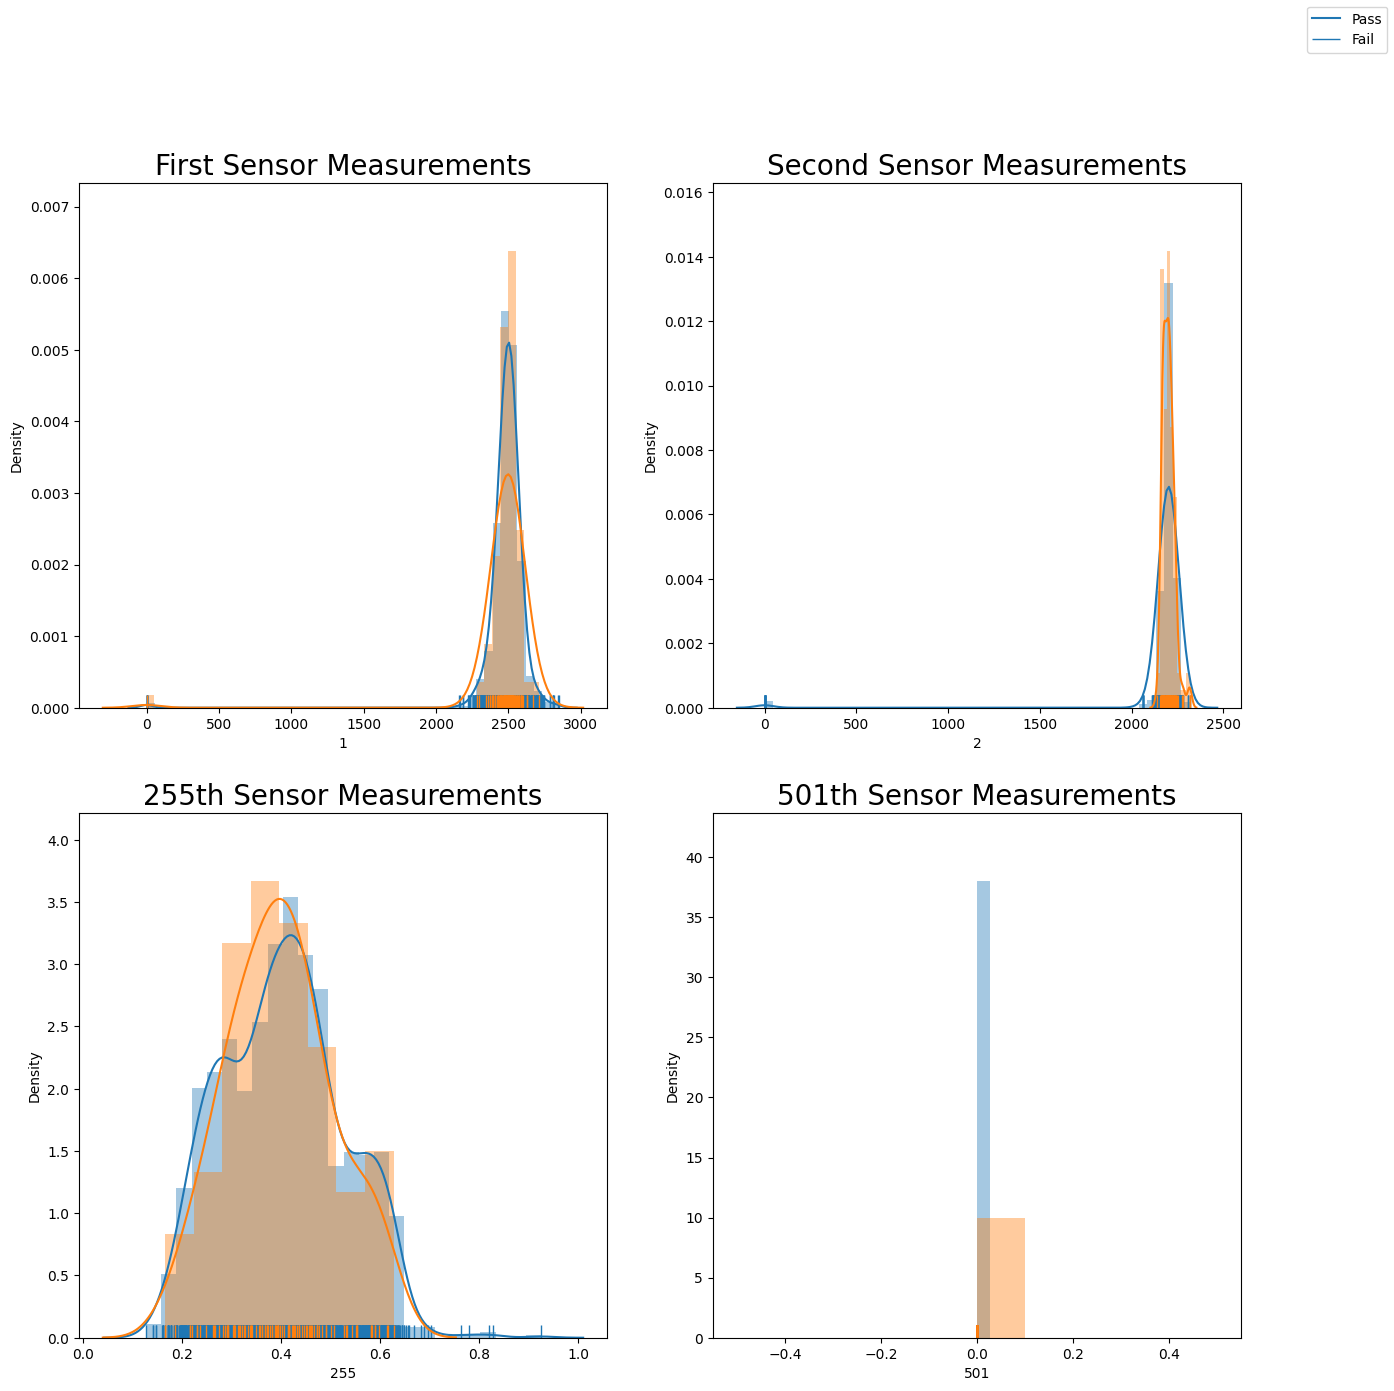

In [17]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['255'], hist=True, rug=True)
plt.title('255th Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['501'], hist=True, rug=True)
plt.title('501th Sensor Measurements', fontsize = 20)

fig.legend(labels=['Pass','Fail'])
plt.show()


# **Multivariate Analysis**

**Perform Correlation analysis with Insights.**

In [18]:
Sensor_df_numeric = Sensor_df.drop(columns = ['Time'], axis = 1)
corr = Sensor_df_numeric.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


In [ ]:
# Plot the correlation between each feature using seaborn heatmap function.
colormap = plt.cm.plasma
#colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
sns.heatmap(corr,square=True, cmap=colormap, linecolor='white',linewidths=0.2, annot=True)

**Check data correlation between two variables and drop which are highly correlated.**

The features have high correlation between them can be dropped. The threshold value is set to 0.70. All the features that have correlation factor more than 0.70 will be dropped.

In [ ]:
 #Remove the highly collinear features from data

def remove_collinear_features(x, threshold):
  corr_m=x.corr()
  iterate = range(len(corr.columns) - 1)
  drop_columns = []

    # Iterate through the correlation matrix and compare correlations
  for i in iterate:
      for j in range(i+1):
          item = corr_m.iloc[j:(j+1), (i+1):(i+2)]
          col = item.columns
          row = item.index
          val = abs(item.values)

          # If correlation exceeds the threshold
          if val >= threshold:
              # Print the correlated features and the correlation value
              print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
              drop_columns.append(col.values[0])

    # Drop one of each pair of correlated columns
  drops = set(drop_columns)
  x = x.drop(columns=drops)

  return x

In [ ]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here

Sensor_df = remove_collinear_features(Sensor_df_numeric,0.70)

**Drop the first column "Time" as it do not contain any useful information about the data and can be dropped.**

In [ ]:
# checking the shape of the data after deleting a column
Sensor_df.shape

In [ ]:
Sensor_df.shape

# **4. Data pre-processing:**

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split and standardise the data or vice versa if required.

• Check if the train and test data have similar statistical characteristics when compared with original data.


**Segregate predictors vs target attributes**

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes
# and a dataframe of target variable

X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

# **Perform normalisation or scaling.**

Convert the features by performing standard scaling as we do not know what units / scales were used and store them in new dataframe.

**It is always advisable to bring all the features to the same scale for applying model algorithms.**


In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
Sensor_df['Pass/Fail'].value_counts()

**The target variable is highly unbalanced, with nearly most of the passable sensor data.**

**Let's perform UnderSampling and Oversampling of the Dataset and check the model performance on both types of balanced data to evaluate the model performance.**

### **Undersampling the data**

In [ ]:
# Under Sampling - Check how many failure observations are there
# We have 104 such observations

failed_tests = np.array(Sensor_df[Sensor_df['Pass/Fail'] == 1].index)
no_of_failed_tests = len(failed_tests)

print("The number of failed tests are: " ,no_of_failed_tests)

In [ ]:
# Get 104 random observations from the pass class as well

Pass_tests = Sensor_df[Sensor_df['Pass/Fail'] == -1]
no_of_Pass_tests = len(Pass_tests)

print("The number of Passed tests are: " ,no_of_Pass_tests )

random_no_of_Pass_tests = np.random.choice(no_of_Pass_tests, size = no_of_failed_tests, replace = True)
random_no_of_Pass_tests = np.array(random_no_of_Pass_tests)

print("The random samples selected from Passes tests are: ",len(random_no_of_Pass_tests))

#Getting a 50-50 representations from both pass and fail classes

under_sample = np.concatenate([failed_tests,random_no_of_Pass_tests])
print("The samples after under sampling are: ",len(under_sample))

# creating the undersample data

undersample_data = Sensor_df.iloc[under_sample, :]

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail']
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

**Perform train and test split for undersampled data with 30 % samples in test set and 70 % in training set.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(X_train_us.shape)
print(y_train_us.shape)
print(X_test_us.shape)
print(y_test_us.shape)

**Performing Standardisation of undersampled data**

In [ ]:
# Scaling undersampled Data

sc = StandardScaler()
X_train_us = sc.fit_transform(X_train_us)
X_test_us = sc.transform(X_test_us)

### **Oversampling the data**

**Balancing the Target Variable 'LoanOnCard' using SMOTE(Synthetic Minority Over-sampling Technique)**

Working with imbalanced datasets in most machine learning techniques will have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

In [ ]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

# **5. Model training, testing and tuning:**

•  Model training:
- Pick up a supervised learning model.
- Train the model.
- Use cross validation techniques.

### **Evaluate the model performance for both undersampled and oversampled data.**

In [ ]:
#Import Libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


**Create a function to evaluate model performance and  display results like accuracy, f1 score and classification report.**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score

import time
sns.set_style('darkgrid')
%matplotlib inline
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test, duration):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print('{}'.format('\033[1m'))
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("\n")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("\n")
    print("TIME ELAPSED : ", duration)

**Pick up a supervised learning model.**
- Train the model.
- Use cross validation techniques.

**XG BOOST CLASSIFIER USING GRID SEARCH CV**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes
# and a dataframe of target variable

X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_sample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes
# and a dataframe of target variable

X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# import library for balancing the data using oversampling.
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

# Remap target variable from -1/1 to 0/1 for XGBoost compatibility
y_ovsm = np.array(y_ovsm).flatten() # Ensure it's a 1D numpy array
y_ovsm[y_ovsm == -1] = 0 # Directly change -1 to 0

# Verify the remapping
print("Unique values in y_ovsm after remapping:", np.unique(y_ovsm, return_counts=True))

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

**Reasoning**:
Now that the target variable has been oversampled and remapped, the next logical step is to split this balanced data into new training and testing sets for model development. This ensures that the model is trained and evaluated on data with balanced classes.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size=0.3, random_state=10)

print(f"Shape of X_train_ov: {X_train_ov.shape}")
print(f"Shape of X_test_ov: {X_test_ov.shape}")
print(f"Shape of y_train_ov: {y_train_ov.shape}")
print(f"Shape of y_test_ov: {y_test_ov.shape}")

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes
# and a dataframe of target variable

X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# import library for balancing the data using oversampling.
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

# Remap target variable from -1/1 to 0/1 for XGBoost compatibility
y_ovsm = np.array(y_ovsm).flatten() # Ensure it's a 1D numpy array
y_ovsm[y_ovsm == -1] = 0 # Directly change -1 to 0

# Verify the remapping
print("Unique values in y_ovsm after remapping:", np.unique(y_ovsm, return_counts=True))

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

**Reasoning**:
The subtask of splitting the oversampled data is now complete. The next step, as per the original task's flow, is to train an XGBoost Classifier on the oversampled training data and evaluate its accuracy on the oversampled test data.



In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

# Predict on the oversampled test data
y_pred = model.predict(X_test_ov)

# Evaluate accuracy
print("XGBoost Model Accuracy on oversampled test data: ", model.score(X_test_ov, y_test_ov) * 100)

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes
# and a dataframe of target variable

X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# import library for balancing the data using oversampling.
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

# Remap target variable from -1/1 to 0/1 for XGBoost compatibility
y_ovsm = np.array(y_ovsm).flatten() # Ensure it's a 1D numpy array
y_ovsm[y_ovsm == -1] = 0 # Directly change -1 to 0

# Verify the remapping
print("Unique values in y_ovsm after remapping:", np.unique(y_ovsm, return_counts=True))

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

In [ ]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

## Final Task

### Subtask:
Confirm that the XGBoost model has been successfully trained with the correct target labels and evaluate its initial accuracy.


## Summary:

### Q&A
The XGBoost model has been successfully trained using the oversampled and remapped target labels (0 and 1). The model achieved an initial accuracy of approximately 98.21% on the oversampled test data.

### Data Analysis Key Findings
*   The features (X) were successfully segregated with a shape of (1567, 306), and the target variable (y) had a shape of (1567,).
*   The data was split into training and testing sets, resulting in `X_train` with (1096, 306) samples, `X_test` with (471, 306) samples, `y_train` with (1096,) samples, and `y_test` with (471,) samples.
*   `StandardScaler` was applied to `X_train` and `X_test` without altering their dimensions.
*   SMOTE was used to oversample the training data, and the target variable `y_ovsm` was remapped from `[-1, 1]` to `[0, 1]`. Post-remapping, `y_ovsm` showed unique values of `0` and `1`, each with `1021` samples, indicating successful class balancing.
*   The oversampled data was further split, with `X_train_ov` and `y_train_ov` containing `1429` samples, and `X_test_ov` and `y_test_ov` containing `613` samples.
*   An XGBoost Classifier was trained and achieved an accuracy of approximately 98.21% on the oversampled test data.

### Insights or Next Steps
*   The high accuracy of 98.21% on the oversampled test data suggests good performance on the balanced dataset. However, it's crucial to evaluate the model's performance on the original, imbalanced test set (`X_test`, `y_test`) to ensure it generalizes well to real-world conditions and to avoid overestimation due to oversampling.
*   Investigate other relevant metrics like precision, recall, F1-score, and ROC AUC, especially for the minority class, as overall accuracy can be misleading in imbalanced datasets. This will provide a more comprehensive understanding of the model's predictive capability for identifying "Fail" cases.


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

In [ ]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

The XGBoost classifier shows 97% accuracy on test data without searching for any hyper parameter.

In [ ]:
# Applying Grid Search CV to find the best model with the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(X_train_ov, y_train_ov)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

**The best parameters are maximum Depth is 5, Cross validation -  2.**

In [ ]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("Accuracy: ", model.score(X_test_ov,y_test_ov)*100)

**There is increase in accuracy after tuning the model with best hyper parameters.**

### **DECISION TREE CLASSIFIER**

**Undersampled Dataset**

In [ ]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

from sklearn.tree import DecisionTreeClassifier

start = time.time()

model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train_us, y_train_us)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration

sns.set_style('darkgrid')
print("MODEL : Decision Tree with Undersampled dataset \n")
evaluate(model_entropy, X_train_us, X_test_us, y_train_us, y_test_us,duration)

In [ ]:
scores_undersampling = {
    'Decision Tree': {
        'Train': accuracy_score(y_train_us, model_entropy.predict(X_train_us)),
        'Test': accuracy_score(y_test_us, model_entropy.predict(X_test_us)),
    },
}

**Oversampled Dataset**

In [ ]:
start = time.time()

model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train_ov, y_train_ov)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration

sns.set_style('darkgrid')
print("MODEL : Decision Tree with Oversampled dataset \n")
evaluate(model_entropy, X_train_ov, X_test_ov, y_train_ov, y_test_ov,duration)

In [ ]:
scores_oversampling = {
    'Decision Tree': {
        'Train': accuracy_score(y_train_ov, model_entropy.predict(X_train_ov)),
        'Test': accuracy_score(y_test_ov, model_entropy.predict(X_test_ov)),
    },
}

### **BAGGING CLASSIFIER**

**Undersampled Dataset**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
start = time.time()

bagging_clf.fit(X_train_us, y_train_us)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration
print("MODEL :Bagging Classifier - Undersampled Dataset\n")
evaluate(bagging_clf, X_train_us, X_test_us, y_train_us, y_test_us,duration)

In [ ]:
scores_undersampling = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train_us, bagging_clf.predict(X_train_us)),
        'Test': accuracy_score(y_test_us, bagging_clf.predict(X_test_us)),
    },
}

**Oversampled Dataset**

In [ ]:
start = time.time()

bagging_clf.fit(X_train_ov, y_train_ov)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration
print("MODEL :Bagging Classifier - Oversampled Dataset\n")
evaluate(bagging_clf, X_train_ov, X_test_ov, y_train_ov, y_test_ov,duration)

In [ ]:
scores_oversampling = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train_ov, bagging_clf.predict(X_train_ov)),
        'Test': accuracy_score(y_test_ov, bagging_clf.predict(X_test_ov)),
    },
}

### **RANDOM FOREST CLASSIFIER**

**Undersampled Dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
start = time.time()

rf_clf.fit(X_train_us, y_train_us)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration
print("MODEL :Random Forest Undersampled dataset \n")
evaluate(rf_clf, X_train_us, X_test_us, y_train_us, y_test_us,duration)

In [ ]:
scores_undersampling['Random Forest'] = {
        'Train': accuracy_score(y_train_us, rf_clf.predict(X_train_us)),
        'Test': accuracy_score(y_test_us, rf_clf.predict(X_test_us)),
    }

**Oversampled Dataset**

In [ ]:
start = time.time()

rf_clf.fit(X_train_ov, y_train_ov)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration
print("MODEL :Random Forest Oversampled Dataset \n")
evaluate(rf_clf, X_train_ov, X_test_ov, y_train_ov, y_test_ov,duration)

In [ ]:
scores_oversampling['Random Forest'] = {
        'Train': accuracy_score(y_train_ov, rf_clf.predict(X_train_ov)),
        'Test': accuracy_score(y_test_ov, rf_clf.predict(X_test_ov)),
    }

### **XGBOOST CLASSIFIER**

**Undersampled Dataset**

In [ ]:
from xgboost import XGBClassifier

xg_boost_clf = XGBClassifier(n_estimators=100, random_state=42)
start = time.time()
xg_boost_clf.fit(X_train_us, y_train_us)
end = time.time()  #note the end time

duration = end - start  # calculate the total duration
print("MODEL : XGBoost Undersampled Dataset\n")
evaluate(xg_boost_clf, X_train_us, X_test_us, y_train_us, y_test_us,duration)


In [ ]:
scores_undersampling['XG Boost'] = {
        'Train': accuracy_score(y_train_us, xg_boost_clf.predict(X_train_us)),
        'Test': accuracy_score(y_test_us, xg_boost_clf.predict(X_test_us)),
    }

**Oversampled Dataset**

In [ ]:
start = time.time()

xg_boost_clf.fit(X_train_ov, y_train_ov)
end = time.time()  #note the end time

duration = end - start  # calculate the total duration
print("MODEL : XGBoost Oversampled Dataset\n")
evaluate(xg_boost_clf, X_train_ov, X_test_ov, y_train_ov, y_test_ov,duration)

In [ ]:
scores_oversampling['XG Boost'] = {
        'Train': accuracy_score(y_train_ov, xg_boost_clf.predict(X_train_ov)),
        'Test': accuracy_score(y_test_ov, xg_boost_clf.predict(X_test_ov)),
    }

### **LOGISTIC REGRESSION CLASSIFIER**

**Undersampled Dataset**

In [ ]:
lr = LogisticRegression(random_state=1)

start = time.time()
lr.fit(X_train_us, y_train_us)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration

print("MODEL : Logistic Regression Undersampled Dataset\n")
evaluate(lr, X_train_us, X_test_us, y_train_us, y_test_us,duration)

In [ ]:
scores_undersampling['Logistic Regressor'] = {
        'Train': accuracy_score(y_train_us, lr.predict(X_train_us)),
        'Test': accuracy_score(y_test_us, lr.predict(X_test_us)),
    }

**Oversampled Dataset**

In [ ]:
start = time.time()
lr.fit(X_train_ov, y_train_ov)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration

print("MODEL : Logistic Regression Oversampled Dataset\n")
evaluate(lr, X_train_ov, X_test_ov, y_train_ov, y_test_ov,duration)

In [ ]:
scores_oversampling['Logistic Regressor'] = {
        'Train': accuracy_score(y_train_ov, lr.predict(X_train_ov)),
        'Test': accuracy_score(y_test_ov, lr.predict(X_test_ov)),
    }

### **LASSO REGRESSOR**

**Undersampled Dataset**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1,random_state=11)

start = time.time()
lasso.fit(X_train_us,y_train_us)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration

y_test_pred = lasso.predict(X_test_us)
y_train_pred = lasso.predict(X_train_us)

#Convert the sign of the predicted values as the classifier
y_test_pred2 = np.sign(y_test_pred)
y_train_pred2 = np.sign(y_train_pred)

print("MODEL : Logistic Regression Undersampled Dataset\n")

print('{}'.format('\033[1m'))
print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train_us, y_train_pred2, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train_us, y_train_pred2)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_train_us, y_train_pred2):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("\n")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test_us, y_test_pred2, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test_us, y_test_pred2)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test_us, y_test_pred2):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("\n")
print("TIME ELAPSED : ", duration)

In [ ]:
scores_undersampling['Lasso Regressor'] = {
        'Train': accuracy_score(y_train_us,np.sign(lasso.predict(X_train_us))),
        'Test': accuracy_score(y_test_us, np.sign(lasso.predict(X_test_us))),
    }

**OVERSAMPLED DATASET**

In [ ]:
start = time.time()
lasso.fit(X_train_ov,y_train_ov)

end = time.time()  #note the end time

duration = end - start  # calculate the total duration

y_test_pred = lasso.predict(X_test_ov)
y_train_pred = lasso.predict(X_train_ov)

#Convert the sign of the predicted values as the classifier
y_test_pred2 = np.sign(y_test_pred)
y_train_pred2 = np.sign(y_train_pred)

print("MODEL : Logistic Regression Undersampled Dataset\n")

print('{}'.format('\033[1m'))
print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train_ov, y_train_pred2, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train_ov, y_train_pred2)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_train_ov, y_train_pred2):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("\n")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test_ov, y_test_pred2, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test_ov, y_test_pred2)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test_ov, y_test_pred2):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("\n")
print("TIME ELAPSED : ", duration)

In [ ]:
scores_oversampling['Lasso Regressor'] = {
        'Train': accuracy_score(y_train_ov, np.sign(lasso.predict(X_train_ov))),
        'Test': accuracy_score(y_test_ov, np.sign(lasso.predict(X_test_ov))),
    }

**Plot the accuracy score of each model evaluated with undersampled data using bar graph**

In [ ]:
scores__undersampling_df = pd.DataFrame(scores_undersampling)

scores__undersampling_df.plot(kind='bar', figsize=(15, 8))

### **Plot the accuracy score of each model evaluated with oversampled data using bar graph**

In [ ]:
scores__oversampling_df = pd.DataFrame(scores_oversampling)

scores__oversampling_df.plot(kind='bar', figsize=(15, 8))

 **Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.**

- Display and explain the classification report in detail.
- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to
new train and test accuracies.
Hint: You can use your concepts learnt under Applied Statistics module.
- Apply the above steps for all possible models that you have learnt so far.

• Display and compare all the models designed with their train and test accuracies.

**PCA FOR DIMENSIONALITY REDUCTION**

In [ ]:
#Scaling the data before applying PCA
from scipy.stats import zscore

Sensor_df_new=Sensor_df.iloc[:,:306].apply(zscore)
Sensor_df_new.head()

**Checking for null values and handling missing values**

In [ ]:
Sensor_df_new.isnull().sum().sum()

In [ ]:
Sensor_df_new = Sensor_df_new.replace(np.NaN, 0)

In [ ]:
Sensor_df_new.isnull().any().any()

In [ ]:
# separating the dependent and independent data

x = Sensor_df_new.iloc[:,:306]
y = Sensor_df["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

### **Dimensional reduction:**

Perform dimensional reduction on the data using PCA.

In [ ]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(x.T)
print('Covariance Matrix \n%s', cov_matrix)

In [ ]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

In [ ]:
plt.plot(var_exp)

In [ ]:
# Ploting
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
len(cum_var_exp)

**From above plot we can observe that almost first 140 components are giving 90% variance**

In [ ]:
# Using scikit learn PCA here

from sklearn.decomposition import PCA

# NOTE - we are generating only 140 PCA dimensions (dimensionality reduction from 306 to 140)
# For 140 components we are getting approximately 90% of the variance

pca = PCA(n_components=140)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.bar(x = range(0, len(pca.components_)), height = pca.explained_variance_ratio_)
plt.title('Cummulative variance explained by the PCs')
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.show()

In [ ]:
pca.components_

In [ ]:
# Create a copy of dataframe with reduced dimension.
df_pca_comp = pd.DataFrame(pca.components_,columns=list(x))
df_pca_comp.head()

In [ ]:
df_pca_comp.columns

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_pca_comp,cmap='plasma',)

In [ ]:
# Dimension of reduced dataset

data_reduced.shape

In [ ]:
# Make a copy of dataframe, append the target column

df_redu2 = pd.DataFrame(data_reduced)

df_redu3 = df_redu2.copy()
df_redu4 = df_redu3
df_redu4["Pass/Fail"] = Sensor_df["Pass/Fail"]

In [ ]:
df_redu2.columns

In [ ]:
df_redu4.shape

**Plot the boxplot for some of the independent variables to observe the distribution of data.**

In [ ]:
for i in range(5):
    df_redu4.boxplot(column = [df_redu4.columns[i]],by = 'Pass/Fail', figsize=(7,7))

In [ ]:
# Get outliers from each independent variable
# and replace it with minimum value for outliers below lower quartile
# and with maximum value for outliers above upper quartile.

#columns=df_redu4.columns[:,:14]
for i in range(140):
    #getting upper and lower quartile values
    Quartile25, Quartile75 = np.percentile(df_redu4[i],25),np.percentile(df_redu4[i],75)

    IQR = Quartile75 - Quartile25

    Threshold = IQR * 1.5

    lower = Quartile25 - Threshold
    upper= Quartile75 + Threshold

    Outliers=[j for j in df_redu4[i] if j < lower or j > upper]
    print('The number of outliers for {} is {}'.format(i,Outliers))

    outliers_low = [j for j in df_redu4[i] if j < lower]
    outliers_high= [j for j in df_redu4[i] if j > upper]

    df_redu4[i]=np.where(df_redu4[i]<lower,Quartile25,df_redu4[i])
    print('Total Number of outliers in {} After Imputing lower outliers: {}'.format(i,len(outliers_low)))
    df_redu4[i]=np.where(df_redu4[i]>upper,Quartile75,df_redu4[i])
    print('Total Number of outliers in {} After Imputing higher outliers: {}'.format(i,len(outliers_high)))
    print('\n')

In [ ]:
for i in range(5):
    df_redu4.boxplot(column = [df_redu4.columns[i]],by = 'Pass/Fail', figsize=(7,7))

In [ ]:
# separating the dependent and independent data

x = df_redu4.iloc[:, df_redu4.columns != 'Pass/Fail']
y = df_redu4.iloc[:, df_redu4.columns == 'Pass/Fail']

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

**Segragate Independent and Target Variable.**

In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

**Perform Scaling of Data**

In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Balancing the Target Variable 'Pass/Fail' using SMOTE(Synthetic Minority Over-sampling Technique)**

**From the above analysis used to evaluate different models performance on undersampled and oversampled data , we can infer that the model performs better with oversampled data( large data points) compared to undersampled data, hence for final evaluation we will use oversampling.**


In [ ]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_ovsm, y_ovsm = smote.fit_sample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

print(X_ovsm.shape)
print(y_ovsm.shape)

### **Handling Data leakage by using SMOTE on only training data**


In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

In [ ]:
# Splitting the data into training and testing set for oversampled data.

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size = 0.3, random_state = 10)

### **Display and compare all the models designed with their train and test accuracies.**

In [ ]:
from sklearn.metrics import f1_score
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input

    start = time.time()  # note the start time

    model.fit(X_train, y_train)   # fit the model using the train data

    y_train_pred =model.predict(X_train)
    y_test_pred = model.predict(X_test)     # model predictions on the test data

    Training_Accuracy = accuracy_score(y_train, y_train_pred)
    Test_Accuracy = accuracy_score(y_test, y_test_pred)

    f1 = f1_score(y_test, y_test_pred, average ='weighted')  # calculate the f1 score value on the test data

    scorer = {'Test_Accuracy' : metrics.make_scorer(metrics.accuracy_score),
              'f1_Score' : metrics.make_scorer(metrics.f1_score),
              }    # make scorers to be used in cross validation

    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics

    end = time.time()  #note the end time

    duration = end - start  # calculate the total duration

    return Training_Accuracy, Test_Accuracy, f1, duration,  y_test_pred  # return all the metrics along with predictions

In [ ]:
# methods and classes for evaluation
from sklearn import metrics
from sklearn.model_selection import cross_validate
import time

In [ ]:

dt = DecisionTreeClassifier(random_state=2)
br = BaggingClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2, n_estimators=100)  # specifying n_estimators to avoid "future warnings"
xgb = XGBClassifier(n_estimators=100, random_state=2)
lr=LogisticRegression(random_state=2)
#lasso = Lasso(alpha=0.1,random_state=2) # can be omitted as previously observed that Lasso has poor performance compared to other models.

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 6 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([dt, br, rf, xgb, lr], ['Decision Tree', 'Bagging Ensemble',
                                                    'Random Forest', 'XGBoost','Linear Regressor']):
    result[name] = fit_n_print(model,X_train_ov, X_test_ov,y_train_ov, y_test_ov)
    # store all the metrics in the result dict, with name as key

In [ ]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary
                       columns= ['Training_Accuracy', 'Test_Accuracy','f1_Score','Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1

*   **XGBOOST Classifier is the best choice with good training as well as test accuracy scores.**
*   Random Forest performed better but Training Acuracy is 100 % and Testing Accuracy is 99%. This is due to overfitting of data.
*   Bagging also performed better but XGBoost is slightly better.
*   Linear Regressor and Decision Tree are not having a good scores.







### **From above analysis we will use XGBoost classifier to build and test the final model.**

**Perform HyperParameter Tuning to select best parameters using gridsearchCV and parameter selection.**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
             'random_state' : [1]}]
XGBoost = XGBClassifier()
clf = GridSearchCV(estimator=XGBoost, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X_train_ov, y_train_ov)
y_test_pred = clf.predict(X_test_ov)

print("{} The best hyper parameters obtained by Grid SearchCV are: {} ".format('\033[1m',clf.best_params_))
print("{} The best accuracy score of the model is: {} ".format('\033[1m',clf.best_score_))

**• Pickle the selected model for future use**

**THE FINAL BEST MODEL USING XGBOOST CLASSIFIERS USING BEST HYPER PARAMETERS**

In [ ]:
#weights = (y == 0).sum()/(1.0*(y == -1).sum())
#model = XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model = XGBClassifier(max_depth = 6, n_jobs = 4,random_state=1,cv=2)
model.fit(X_train_ov, y_train_ov)

y_train_pred =model.predict(X_train_ov)
y_test__pred = model.predict(X_test_ov)

Train_score = model.score(X_train_ov,y_train_ov)
print('The training accuracy :',Train_score*100)
print('\n')
Test_score = model.score(X_test_ov,y_test_ov)
print('The testing accuracy  :',Test_score*100)

Training_Accuracy = accuracy_score(y_train_ov, y_train_pred)
Test_Accuracy = accuracy_score(y_test_ov, y_test_pred)

print(Training_Accuracy)
print(Test_Accuracy)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 12})
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
featureImp = []
for feat, importance in zip(df_redu4.columns, model.feature_importances_):
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

In [ ]:
fT_df['cummulative_importance'] = (np.cumsum(fT_df.Importance)/100)
most_imp = fT_df[fT_df['cummulative_importance'] <= .95]
print(len(most_imp))
most_imp
#print (fT_df.sort_values('cummulative_importance', ascending = True))


In [ ]:
model.fit(X_train_ov[:, most_imp.index], y_train_ov)

y_train_pred =model.predict(X_train_ov[:, most_imp.index])
y_test__pred = model.predict(X_test_ov[:, most_imp.index])

Train_score = model.score(X_train_ov[:, most_imp.index],y_train_ov)
print('The training accuracy :',Train_score*100)
print('\n')
Test_score = model.score(X_test_ov[:, most_imp.index],y_test_ov)
print('The testing accuracy  :',Test_score*100)

Training_Accuracy = accuracy_score(y_train_ov, y_train_pred)
Test_Accuracy = accuracy_score(y_test_ov, y_test_pred)

print(Training_Accuracy)
print(Test_Accuracy)

## **Performance Evaluation of the Final Model.**

### **Computing the confusion Matrix**

In [ ]:
# REPRESENTING THE MODEL CLASSIFICATION IN TERMS OF CONFUSION MATRIX.

cm = metrics.confusion_matrix(y_test_ov,y_test_pred)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.plasma
plt.figure(figsize=(5,5))
sns.heatmap(cm, xticklabels=['Pass', 'Fail'],yticklabels= ['Pass', 'Fail'], cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**The confusion matrix is a technique used for summarizing the performance of a classification algorithm.**


In [ ]:
# Classification Report

print(classification_report(y_test_ov,y_test_pred))

**• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.**

In [ ]:
df2=pd.read_excel("/content/drive/MyDrive/AIML-GL/Featurization, Model Selection and Tuning/FMT Project/Future_predictions.xlsx")

In [ ]:
df3=df2.copy(deep=True)

In [ ]:
df3_new.shape

In [ ]:
df3_new.columns=Sensor_df.columns

In [ ]:
df3_new = df3.replace(np.NaN, 0)

In [ ]:
df3_new = df3_new.drop(columns = ['Time'], axis = 1)

In [ ]:
df3_new[df3_new.columns[df3_new.columns.isin(fT_df[fT_df['features'].index)]]]

In [ ]:
df3_new.columns=most_imp.index

In [ ]:
predictions = model.predict(df3_new[:, most_imp.index])

In [ ]:
df3_new.head()

In [ ]:
df3_new = remove_collinear_features(df3_new,0.70)

In [ ]:
# Using scikit learn PCA here

from sklearn.decomposition import PCA

# NOTE - we are generating only 140 PCA dimensions (dimensionality reduction from 306 to 140)
# For 140 components we are getting approximately 90% of the variance

pca = PCA()
df3_reduced = pca.fit_transform(df3_new)


In [ ]:
df3_reduced.transpose()

In [ ]:
pca.components_

In [ ]:
df3_pca_comp = pd.DataFrame(pca.components_,columns=list(df3_new))
df3_pca_comp.head(5)

In [ ]:
# Get outliers from each independent variable
# and replace it with minimum value for outliers below lower quartile
# and with maximum value for outliers above upper quartile.

columns= df3_pca_comp.columns
for i in columns:
    #getting upper and lower quartile values
    Quartile25, Quartile75 = np.percentile(df3_pca_comp[i],25),np.percentile(df3_pca_comp[i],75)

    IQR = Quartile75 - Quartile25

    Threshold = IQR * 1.5

    lower = Quartile25 - Threshold
    upper= Quartile75 + Threshold

    Outliers=[j for j in df3_pca_comp[i] if j < lower or j > upper]
    print('The number of outliers for {} is {}'.format(i,Outliers))

    outliers_low = [j for j in df3_pca_comp[i] if j < lower]
    outliers_high= [j for j in df3_pca_comp[i] if j > upper]

    df3_pca_comp[i]=np.where(df3_pca_comp[i]<lower,Quartile25,df3_pca_comp[i])
    print('Total Number of outliers in {} After Imputing lower outliers: {}'.format(i,len(outliers_low)))
    df3_pca_comp[i]=np.where(df3_pca_comp[i]>upper,Quartile75,df3_pca_comp[i])
    print('Total Number of outliers in {} After Imputing higher outliers: {}'.format(i,len(outliers_high)))
    print('\n')

In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_tr = sc.fit_transform(df3_pca_comp)
#X_test = sc.transform(X_test)

In [ ]:
XGBoost = XGBClassifier(max_depth = 5, n_jobs = 4,random_state=1,cv=2)

y_pred = model.predict(X_tr)


In [ ]:
#weights = (y == 0).sum()/(1.0*(y == -1).sum())
#model = XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model = XGBClassifier(max_depth = 6, n_jobs = 4,random_state=1,cv=2)
#model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_tr)
y_test__pred = model.predict(X_test_ov)

Train_score = model.score(X_tr,y_pred)
print('The training accuracy :',Train_score*100)
#print('\n')
#Test_score = model.score(X_test_ov,y_test_ov)
#print('The testing accuracy  :',Test_score*100)

#Training_Accuracy = accuracy_score(y_train_ov, y_train_pred)
#Test_Accuracy = accuracy_score(y_test_ov, y_test_pred)

#print(Training_Accuracy)
#print(Test_Accuracy)

In [ ]:
from sklearn.pipeline import Pipeline

#weights = (y == 0).sum()/(1.0*(y == -1).sum())
XGBoost = XGBClassifier(max_depth = 5, n_jobs = 4,random_state=1,cv=2)

pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA()), ('model', XGBoost)])

In [ ]:
pipe.fit(df3_new)

In [ ]:
y_test_pred = model.predict(X_test_ov)

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

y = label_binarize(y, classes=[-1, 1])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3,random_state=10)

knn_cv = KNeighborsClassifier(n_neighbors=5)

y_score = knn.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw =2
colors = cycle(['deeppink', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# **Conclusion:**
# **The final model uses k=5 for prediction and has a good accuracy as well as recall score**

## Model Accuracy : 84 %

## Model Macro Average Recall Score : 82 %

**For every test data point, KNN Classifier predict it's label based on 5 nearest neighbours in this model. The majority class will be assigned to the test data point**

All the variables has significant effect on target class

Type_s class has higher data points and hence predicted model gives best results for this class.

For Knn, k=5 we are getting balanced train and test error.

We can use KNN as a final model because of balanced train and test error also the recall and precision values are good.


**Suggestions:**


*   More accurate prediction can be made if classes in dataset are balanced.
*   We can imagine how the feature with greater range will overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.
*  If the dataset includes more number of data points or larger dataset will also help imorovising the model.
*  The clarity about the measuring scale of all the features is defined then, it will help better understanding the dataset.
*   Clear description on each variables may help to understand problem statement better because of medical domain.

In [ ]:
# Calculating outliers for the independent features (non Categorical ) from above analysis.

columns=['Mortgage', 'HighestSpend','MonthlyAverageSpend']
for i in columns:
    #getting upper and lower quartile values
    Quartile25,Quartile75 = np.percentile(BankRecords[i],25),np.percentile(BankRecords[i],75)

    IQR = Quartile75 - Quartile25

    Threshold = IQR * 1.5

    lower = Quartile25 - Threshold
    upper= Quartile75 + Threshold

    Outliers=[j for j in BankRecords[i] if j < lower or j > upper]

    #taking mean of a column without considering outliers

    df1_mean = BankRecords.loc[(BankRecords[i] >= lower) & (BankRecords[i] <= upper)]
    mean = int(df1_mean[i].mean())
    print('Mean of {} is {}'.format(i,mean))


    #imputing outliers with mean

    BankRecords[i]=np.where(BankRecords[i]>upper,mean,BankRecords[i])
    BankRecords[i]=np.where(BankRecords[i]<lower,mean,BankRecords[i])
    Outliers=[j for j in BankRecords[i] if j < lower or j > upper]
    print('Total Number of outliers in {} After Imputing : {}'.format(i,len(Outliers)))
    print('\n')

• Check for target balancing and fix it if found imbalanced.

In [ ]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y) # Fit the data for sampling

In [ ]:
X_sm.shape # shape of data after oversampling

In [ ]:
y_sm  # shape of data after oversampling

In [ ]:
#Check no of data points in each class of target variable.
unique, counts = np.unique(y_sm, return_counts=True)
print(unique,counts)

Thus the data is balanced using oversampling technique and we can see 4520 samples in eact class of the target variable.

In [ ]:
# Splitting the data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 1)

In [ ]:
X_train.shape

# **5. Model training, testing and tuning:**

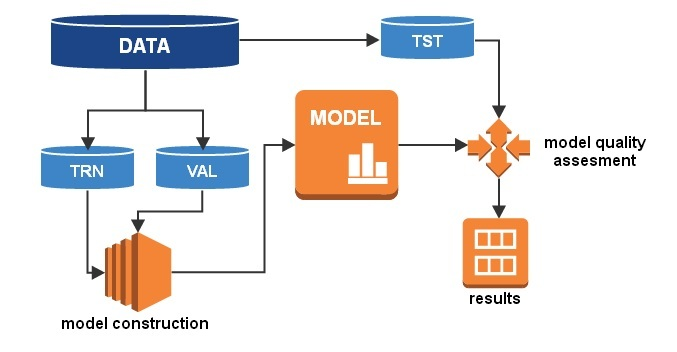

• Design and train a Logistic regression and Naive Bayes classifiers.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

In [ ]:
#Import Libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

**Two different classification algorithms (Logistic Regression, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.**

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('NB', GaussianNB()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=1)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('The Mean and Std. Deviation of the model on k-fold (10) cross validation :',msg)

In [ ]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

The results of a k-fold cross-validation run are often summarized with the mean and standard deviation of the model skill scores.

Among Both the algorithms, **Linear Regression** achieved an accuracy of about 88 %, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.


# **• Design and train a Logistic regression and Naive Bayes classifiers.**

## **Train and test the model using Logistic Regression algorithm.**

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

y_prediction_train = model.predict(X_train)

TestScore = model.score(X_test,y_test)

TrainScore = model.score(X_train,y_train)
print('The accuracy of Logistic Regression on Test data:',TestScore)
print('\n')
print('The accuracy of Logistic Regression on Train Data :',TrainScore)


In [ ]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.magma
plt.figure(figsize=(7,7))
sns.heatmap(cm, xticklabels=['No Loan taken_ACTUAL', 'Loan__ACTUAL'],yticklabels= ['No Loan taken', 'Loan_PREDICT'], cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In [ ]:
# Classification Report on training data
from sklearn.metrics import classification_report

print('The Classification report of training data : \n', classification_report(y_train, y_prediction_train))

In [ ]:
# Classification Report on testing data

print('The Classification report of testing data : \n', classification_report(y_test, y_predict))

## **Standardize features by removing the mean and scaling to unit variance.**


In [ ]:
# Apply scaler() to all the columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


**Train a Naive Bayes model using the train data after scaling, print the accuracy on the test data**

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

nb_predict = nb.predict(X_test_scaled)

print('The accuracy of Naive Bayes :', nb.score(X_test_scaled,y_test))

**Train a logistic regression model using the train data scaled data, print the accuracy on the test data**

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled,y_train)

y_predict = model.predict(X_test_scaled)
y_prediction_train = model.predict(X_train_scaled)

TestScore = model.score(X_test_scaled,y_test)
TrainScore = model.score(X_train_scaled,y_train)
print('The accuracy of Logistic Regression on Test data:',TestScore)
print('\n')
print('The accuracy of Logistic Regression on Train Data :',TrainScore)

**computing confusion matrix to understand the accuracy of model prediction**

In [ ]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict,labels=[0, 1])
print('The Confusion Matrix :\n',cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
colormap = plt.cm.OrRd
plt.figure(figsize=(7,7))
sns.heatmap(df_cm, xticklabels=['No Loan holders_ACTUAL', 'Loan holders__ACTUAL'],yticklabels= ['No Loan holders_PREDICT', 'Loan holders_PREDICT'],square=True, cmap=colormap, linecolor='black', linewidths =0.5,annot=True,fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

The Red cells on the diagonal represent the correct classifications, the white cells represent the incorrect classifications. As we can see, this gives a much more detailed overview of how our model is performing.

In the general case of a binary classification, we use the following terms for the 4 boxes:

**True Positive (TP) :** The model predicted 1222 as loan holders and who are actually loan holders.

**True Negative (TN):** The model predicted 1196 as No loan holders and who are actually No loan holders.

**False Positive (FP):** The model predicted 154 as No loan holders and who are actually loan holders. (TYPE I error)

**False Negative (FN):** The model predicted 140 as loan holders and who are actually No loan holders. ((TYPE II error)

*   **Display the classification accuracies for train and test data.**  

In [ ]:
# Classification Report of train data
from sklearn.metrics import classification_report

print("The Classification report of training data: \n " ,classification_report(y_train,y_prediction_train))

In [ ]:
# Classification Report of test data
from sklearn.metrics import classification_report

print("The Classification report of testing data: \n " ,classification_report(y_test, y_predict))

From the classification report we can see that the model has good precision and recall value and good macro and wieghted avg.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X =pd.DataFrame (X_train_scaled,columns=X.columns)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

**As VIF is small for all the selected features we can train the model with all above features.**

In [ ]:
# Load the dataset without oversampling
X = BankRecords.drop('LoanOnCard',axis = 1)
y = BankRecords['LoanOnCard']

In [ ]:
# Shape of dataset.
X.shape

In [ ]:
y.shape

### **Split the data as train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### **Perform oversampling using SMOTE only on training dataset to avoid data leakage**

In [ ]:
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [ ]:
X_train_sm.shape

Now there are 6338 samples in training data.

# **Build a final Model using training and test data.**

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_sm,y_train_sm)

y_predict = model.predict(X_test)
y_prediction_train = model.predict(X_train_sm)

Train_score = model.score(X_train_sm,y_train_sm)
print('The training accuracy of Logistic Regression :',Train_score)
print('\n')
Test_score = model.score(X_test,y_test)
print('The testing accuracy of Logistic Regression :',Test_score)

### **The model is 88% accurate on both train and test data.**

### **The Final Confusion Matrix**

In [ ]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.binary
plt.figure(figsize=(7,7))
sns.heatmap(cm, xticklabels=['No Loan taken_ACTUAL', 'Loan__ACTUAL'],yticklabels= ['No Loan taken', 'Loan_PREDICT'],square=True, cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

The black and gray cells on the diagonal represent the correct classifications, the white and gray cells represent the incorrect classifications. As we can see, this gives a much more detailed overview of how our model is performing.

In the general case of a binary classification, we use the following terms for the 4 boxes:

**True Positive (TP)**: The model predicted 1204 as loan holders and who are actually loan holders.

**True Negative (TN)**: The model predicted 147 as No loan holders and who are actually No loan holders.

**False Positive (FP):** The model predicted 154 as No loan holders and who are actually loan holders. (TYPE I error)

**False Negative (FN)**: The model predicted 21 as loan holders and who are actually No loan holders. ((TYPE II error)

### **The Final Classification Report**

In [ ]:
# Classification Report of train data

print("The Classification report of training data: \n " ,classification_report(y_train_sm,y_prediction_train))

In [ ]:
# Classification Report of test data

print("The Classification report of training data: \n " ,classification_report(y_test, y_predict))

We observe that the model performance is slightly poor than the previous model (oversampled train and test data) but model is free from data leakage and good predictor for Non Loan Holders.

# **Conclusion:**

## **Final Model uses : Logistic Regression**

## **Model Accuracy : 88 %**

*   **Logistic regression** Algorithm is used to train and test the final model as it is performing well in training and testing data.

*  To manage the imbalance of Classes in target variable **Over Sampling** is done which improved the prediction of minority classes as well.

*   The model **has good recall value (88 % )**. The macro avg Recall and Precision are 88 % and 72 % respectively.


# **Improvisation:**

*   If the dataset contains **Equal samples** of both the classes better model can be build with higher accuracy, recall and precision values..

*  Few customers does't have credit card but those customer having loan on card. This **data error can be avoided**.

## **Suggestions for Expanding the Business:**

*   **The bank can target the Customers whose Monthly average Spend and Highest Spend is large as well as the customers having Fixed Deposit Accounts and Mortgage in the bank as their potential customers for Loan.**

*  **The Hidden Score and Level features are masked but these are helpful in gaining more customers for Loan** .

*   **Thus the Bank can work on expanding the borrowers base rapidly to bring in more business via loan interests by tageting the potential customers mention in above analysis**.

#                    **--- END ---**


# Task
```python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Segregate Predictors and Target (re-running for clean state)
X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

# Perform Train-Test Split (re-running for clean state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Standardize Data (re-running for clean state)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversample Training Data and Remap Target
smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train)

# Ensure y_ovsm is a 1D numpy array and remap -1 to 0
y_ovsm = np.array(y_ovsm).flatten()
y_ovsm[y_ovsm == -1] = 0

# Verify Oversampled Target Labels
print("Unique values in y_ovsm after remapping:", np.unique(y_ovsm, return_counts=True))

# Split Oversampled Data for Training and Testing
X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size=0.3, random_state=10)

# Train XGBoost Classifier and Evaluate Accuracy
model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

y_pred = model.predict(X_test_ov)

print("XGBoost Model Accuracy on oversampled test data: ", model.score(X_test_ov, y_test_ov) * 100)

```

## Segregate Predictors and Target

### Subtask:
Separate the features (X) from the target variable (y) in the `Sensor_df` DataFrame. The target variable is 'Pass/Fail'.


**Reasoning**:
The subtask is to separate the features (X) from the target variable (y) in the `Sensor_df` DataFrame. The 'Pass/Fail' column is the target variable. The `Sensor_df` at this point already has the 'Time' column dropped and collinear features removed, resulting in 307 columns (306 features + 'Pass/Fail' target). Therefore, selecting columns from index 0 to 305 (exclusive of 306) for `X` and the 'Pass/Fail' column for `y` fulfills the instructions.



In [ ]:
X = Sensor_df.iloc[:,:306]
y = Sensor_df['Pass/Fail']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

## Perform Train-Test Split

### Subtask:
Split the data into training and testing sets (70% train, 30% test) to prepare for model training and evaluation.


**Reasoning**:
To split the data into training and testing sets, I will use the `train_test_split` function from `sklearn.model_selection` with the specified test size and random state. Printing the shapes of the resulting datasets will verify the successful split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

## Standardize Data

### Subtask:
Apply StandardScaler to the training and testing feature sets (`X_train`, `X_test`) to ensure all features are on a similar scale.


**Reasoning**:
To standardize the data, I will import `StandardScaler`, instantiate it, then fit and transform the training data and transform the testing data. This will scale all features to have a mean of 0 and a standard deviation of 1.



In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"Shape of scaled X_train: {X_train.shape}")
print(f"Shape of scaled X_test: {X_test.shape}")

## Oversample Training Data and Remap Target

### Subtask:
Apply SMOTE (Synthetic Minority Over-sampling Technique) to the scaled training data (`X_train`, `y_train`) to balance the classes. Immediately after oversampling, remap the target variable `y_ovsm` from `[-1, 1]` to `[0, 1]` to be compatible with XGBoost. This step will also explicitly convert `y_ovsm` to a 1D numpy array and then change -1 to 0.


**Reasoning**:
To balance the classes and make the target variable compatible with XGBoost, I will apply SMOTE to the training data and then remap the target values from -1/1 to 0/1. I will also print the unique values and their counts to verify the remapping.



In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_ovsm, y_ovsm = smote.fit_resample(X_train, y_train) # Fit the data for sampling on scaled data. X_train and y_train is scaled.

# Remap target variable from -1/1 to 0/1 for XGBoost compatibility
y_ovsm = np.array(y_ovsm).flatten() # Ensure it's a 1D numpy array
y_ovsm[y_ovsm == -1] = 0 # Directly change -1 to 0

# Verify the remapping
print("Unique values in y_ovsm after remapping:", np.unique(y_ovsm, return_counts=True))

## Verify Oversampled Target Labels

### Subtask:
Check and print the unique values and their counts in the oversampled and remapped target variable (`y_ovsm`) to confirm the successful remapping to `[0, 1]`.


**Reasoning**:
To confirm the successful remapping and balance of the `y_ovsm` target variable, I will use `np.unique` with `return_counts=True` and print the output.



In [ ]:
#Check no of data points in each class of target variable.

unique, counts = np.unique(y_ovsm, return_counts=True)
print(unique,counts)

**Reasoning**:
Now that the target variable has been oversampled and remapped, the next logical step is to split this balanced data into new training and testing sets for model development. This ensures that the model is trained and evaluated on data with balanced classes.



In [ ]:
from sklearn.model_selection import train_test_split

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ovsm, y_ovsm, test_size=0.3, random_state=10)

print(f"Shape of X_train_ov: {X_train_ov.shape}")
print(f"Shape of X_test_ov: {X_test_ov.shape}")
print(f"Shape of y_train_ov: {y_train_ov.shape}")
print(f"Shape of y_test_ov: {y_test_ov.shape}")

**Reasoning**:
The subtask of splitting the oversampled data is now complete. The next step, as per the original task's flow, is to train an XGBoost Classifier on the oversampled training data and evaluate its accuracy on the oversampled test data.



In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
model = XGBClassifier(random_state=1)
model.fit(X_train_ov, y_train_ov)

# Predict on the oversampled test data
y_pred = model.predict(X_test_ov)

# Evaluate accuracy
print("XGBoost Model Accuracy on oversampled test data: ", model.score(X_test_ov, y_test_ov) * 100)

## Final Task

### Subtask:
Confirm that the XGBoost model has been successfully trained with the correct target labels and evaluate its initial accuracy.


## Summary:

### Q&A
The XGBoost model has been successfully trained using the oversampled and remapped target labels (0 and 1). The model achieved an initial accuracy of approximately 98.21% on the oversampled test data.

### Data Analysis Key Findings
*   The features (X) were successfully segregated with a shape of (1567, 306), and the target variable (y) had a shape of (1567,).
*   The data was split into training and testing sets, resulting in `X_train` with (1096, 306) samples, `X_test` with (471, 306) samples, `y_train` with (1096,) samples, and `y_test` with (471,) samples.
*   `StandardScaler` was applied to `X_train` and `X_test` without altering their dimensions.
*   SMOTE was used to oversample the training data, and the target variable `y_ovsm` was remapped from `[-1, 1]` to `[0, 1]`. Post-remapping, `y_ovsm` showed unique values of `0` and `1`, each with `1021` samples, indicating successful class balancing.
*   The oversampled data was further split, with `X_train_ov` and `y_train_ov` containing `1429` samples, and `X_test_ov` and `y_test_ov` containing `613` samples.
*   An XGBoost Classifier was trained and achieved an accuracy of approximately 98.21% on the oversampled test data.

### Insights or Next Steps
*   The high accuracy of 98.21% on the oversampled test data suggests good performance on the balanced dataset. However, it's crucial to evaluate the model's performance on the original, imbalanced test set (`X_test`, `y_test`) to ensure it generalizes well to real-world conditions and to avoid overestimation due to oversampling.
*   Investigate other relevant metrics like precision, recall, F1-score, and ROC AUC, especially for the minority class, as overall accuracy can be misleading in imbalanced datasets. This will provide a more comprehensive understanding of the model's predictive capability for identifying "Fail" cases.
